<h1 style="color:purple">Clustering</h1>
<h3 style="color:purple">Vaibhav Lanjewar<br> 2021BIT023 </h3>

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('mht_cet2.csv')


In [2]:
df.head(10)

,rank,percentile,branch,gender,category,fulfillment,seat_type,primary_seat_type,secondary_seat_type,score_type,college_name,enrollment_no,branch_code
0,18388,90.121473,Civil Engineering,M,NT 2 (NT-C),^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22169138,100219110
1,18898,89.889223,Civil Engineering,F,SC,^,LOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22182921,100219110
2,19374,89.540152,Civil Engineering,M,OBC,^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22164339,100219110
3,21857,88.241971,Civil Engineering,M,OBC,^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22169336,100219110
4,22128,88.091617,Civil Engineering,M,DT/VJ,~,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22135944,100219110
5,22579,87.898633,Civil Engineering,M,OBC,^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22209220,100219110
6,23255,87.484048,Civil Engineering,M,SC,^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22151252,100219110
7,24879,86.557640,Civil Engineering,M,OBC,*,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22199682,100219110
8,27735,85.022507,Civil Engineering,F,NT 1 (NT-B),^,LOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22178356,100219110
9,29430,84.149582,Civil Engineering,M,SC$,~,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22235804,100219110


In [3]:
# Quick look at the dataset
print(df.head())

    rank  percentile             branch gender     category fulfillment  \
0  18388   90.121473  Civil Engineering      M  NT 2 (NT-C)           ^   
1  18898   89.889223  Civil Engineering      F           SC           ^   
2  19374   89.540152  Civil Engineering      M          OBC           ^   
3  21857   88.241971  Civil Engineering      M          OBC           ^   
4  22128   88.091617  Civil Engineering      M        DT/VJ           ~   

  seat_type  primary_seat_type secondary_seat_type score_type  \
0    GOPENS  State Level Seats   State Level Seats    MHT-CET   
1    LOPENS  State Level Seats   State Level Seats    MHT-CET   
2    GOPENS  State Level Seats   State Level Seats    MHT-CET   
3    GOPENS  State Level Seats   State Level Seats    MHT-CET   
4    GOPENS  State Level Seats   State Level Seats    MHT-CET   

                                  college_name enrollment_no branch_code  
0  Government College of Engineering, Amravati    EN22169138   100219110  
1  Gover

In [15]:
# Remove the specified columns
columns_to_remove = ["fulfillment", "branch_code", "enrollment_no", "score_type"]
df = df.drop(columns=columns_to_remove)

# Display the first few rows of the dataset to verify the changes
print(df.head())

    rank  percentile             branch gender     category seat_type  \
0  18388   90.121473  Civil Engineering      M  NT 2 (NT-C)    GOPENS   
1  18898   89.889223  Civil Engineering      F           SC    LOPENS   
2  19374   89.540152  Civil Engineering      M          OBC    GOPENS   
3  21857   88.241971  Civil Engineering      M          OBC    GOPENS   
4  22128   88.091617  Civil Engineering      M        DT/VJ    GOPENS   

   primary_seat_type secondary_seat_type  \
0  State Level Seats   State Level Seats   
1  State Level Seats   State Level Seats   
2  State Level Seats   State Level Seats   
3  State Level Seats   State Level Seats   
4  State Level Seats   State Level Seats   

                                  college_name  
0  Government College of Engineering, Amravati  
1  Government College of Engineering, Amravati  
2  Government College of Engineering, Amravati  
3  Government College of Engineering, Amravati  
4  Government College of Engineering, Amravati  


In [55]:
df.columns

Index(['rank', 'percentile', 'branch', 'gender', 'category', 'seat_type',
       'primary_seat_type', 'secondary_seat_type', 'college_name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   rank                 104345 non-null  int64  
 1   percentile           104345 non-null  float64
 2   branch               104345 non-null  object 
 3   gender               104345 non-null  object 
 4   category             104345 non-null  object 
 5   seat_type            104345 non-null  object 
 6   primary_seat_type    104345 non-null  object 
 7   secondary_seat_type  104345 non-null  object 
 8   college_name         104345 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ MB


In [16]:
from sklearn.preprocessing import StandardScaler
# Step 1: Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=['branch', 'gender', 'category', 'seat_type', 'primary_seat_type', 'secondary_seat_type', 'college_name'])

# Step 2: Normalize Numerical Variables
scaler = StandardScaler()
df_encoded[['rank', 'percentile']] = scaler.fit_transform(df_encoded[['rank', 'percentile']])

# Display the preprocessed DataFrame info
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Columns: 591 entries, rank to college_name_Zeal Education Society's Zeal College of Engineering & Reserch, Narhe, Pune
dtypes: bool(589), float64(2)
memory usage: 60.2 MB
None


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Step 1: Encode Categorical Variables
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

# Label encode categorical variables with high cardinality
high_cardinality_cols = ['branch', 'college_name']
for col in high_cardinality_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-hot encode remaining categorical variables
categorical_cols = ['gender', 'category', 'seat_type', 'primary_seat_type', 'secondary_seat_type']
for col in categorical_cols:
    one_hot_encoded = one_hot_encoder.fit_transform(df[[col]])
    df_encoded = pd.concat([df_encoded, pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out([col]))], axis=1)

# Step 2: Normalize Numerical Variables
scaler = StandardScaler()
df_encoded[['rank', 'percentile']] = scaler.fit_transform(df_encoded[['rank', 'percentile']])

# Display the preprocessed DataFrame info
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Columns: 759 entries, rank to secondary_seat_type_State Level Seats
dtypes: bool(589), float64(170)
memory usage: 193.9 MB
None


In [18]:
# Step 1: Encode Categorical Variables
label_encoder = LabelEncoder()
df['branch'] = label_encoder.fit_transform(df['branch'])
df['college_name'] = label_encoder.fit_transform(df['college_name'])

# One-hot encode remaining categorical variables using Pandas get_dummies()
categorical_cols = ['gender', 'category', 'seat_type', 'primary_seat_type', 'secondary_seat_type']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Step 2: Normalize Numerical Variables
scaler = StandardScaler()
df_encoded[['rank', 'percentile']] = scaler.fit_transform(df_encoded[['rank', 'percentile']])

# Display the preprocessed DataFrame info
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Columns: 172 entries, rank to secondary_seat_type_State Level Seats
dtypes: bool(168), float64(2), int64(2)
memory usage: 19.9 MB
None


In [19]:
from sklearn.cluster import KMeans

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters as needed

# Fit the model to the preprocessed data
kmeans.fit(df_encoded)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df_encoded['cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(df_encoded.head())


       rank  percentile  branch  college_name  gender_F  gender_M  \
0 -0.999655    1.019362      14            82     False      True   
1 -0.985188    1.010504      14            82      True     False   
2 -0.971686    0.997191      14            82     False      True   
3 -0.901252    0.947678      14            82     False      True   
4 -0.893565    0.941944      14            82     False      True   

   category_DT/VJ  category_DT/VJ#  category_DT/VJ$  category_DT/VJ$#  ...  \
0           False            False            False             False  ...   
1           False            False            False             False  ...   
2           False            False            False             False  ...   
3           False            False            False             False  ...   
4            True            False            False             False  ...   

   secondary_seat_type_Economically Weaker Section Seats  \
0                                              False    

In [11]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df_encoded.drop(columns=['cluster']), df_encoded['cluster'])
print("Silhouette Score:", silhouette_avg)

# Cluster profiling
cluster_profiles = df_encoded.groupby('cluster').mean()
print("\nCluster Profiles:")
print(cluster_profiles)


Silhouette Score: 0.4072006869264816

Cluster Profiles:
             rank  percentile     branch  college_name  gender_F  gender_M  \
cluster                                                                      
0        0.160647   -0.154848  34.095577    243.593782  0.335767  0.664233   
1       -0.105915    0.109842  33.944266     38.536755  0.300525  0.699475   
2       -0.135666    0.128720  35.348904    298.639080  0.312422  0.687578   
3        0.161181   -0.149559  35.069828    115.420471  0.323460  0.676540   
4       -0.032254    0.016619  36.037543    182.442232  0.341714  0.658286   

         category_DT/VJ  category_DT/VJ#  category_DT/VJ$  category_DT/VJ$#  \
cluster                                                                       
0              0.016061         0.000243         0.001947          0.000243   
1              0.017631         0.000219         0.002076          0.000146   
2              0.015751         0.000162         0.001353          0.000271   
3 


Cluster Centers:
[[ 1.60647284e-01 -1.54847990e-01  3.40955771e+01  2.43593782e+02
   3.35766867e-01  6.64233133e-01  1.60613251e-02  2.43353410e-04
   1.94682728e-03  2.43353410e-04  6.08383525e-05  1.21676705e-04
  -1.10114283e-19  6.08383525e-05  2.19018069e-02  4.86706820e-04
   1.76431222e-03  8.51736935e-04  1.82515057e-04 -7.75882180e-19
   1.35525272e-19  3.86931922e-02  1.03425199e-03  2.92024092e-03
   7.30060230e-04 -1.10114283e-19  3.65030115e-04 -1.55176436e-18
   6.08383525e-05  1.40536594e-02  1.21676705e-04  5.47545172e-04
   6.08383525e-05  4.86706820e-04  3.93023288e-19  3.93023288e-19
   2.70183123e-01  4.38036138e-03 -7.75882180e-19 -2.20228566e-19
   1.74606072e-02  3.71113950e-03  6.08383525e-05 -1.10114283e-19
  -2.20228566e-19 -2.30392962e-18  6.08383525e-05 -1.10114283e-19
  -1.10114283e-19  2.67688751e-03  6.08383525e-05 -2.20228566e-19
   7.30060230e-04  4.56470159e-01  3.65030115e-03  6.69221877e-04
   4.25868467e-04  7.90898582e-04  2.01983330e-02  4.25868

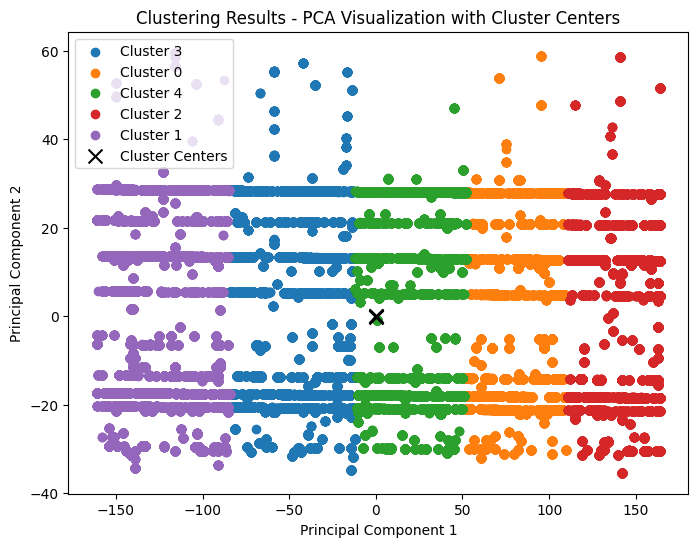

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Print cluster centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop(columns=['cluster']))

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in df_encoded['cluster'].unique():
    plt.scatter(df_pca[df_encoded['cluster'] == cluster][:, 0], df_pca[df_encoded['cluster'] == cluster][:, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results - PCA Visualization with Cluster Centers')
plt.legend()
plt.show() 


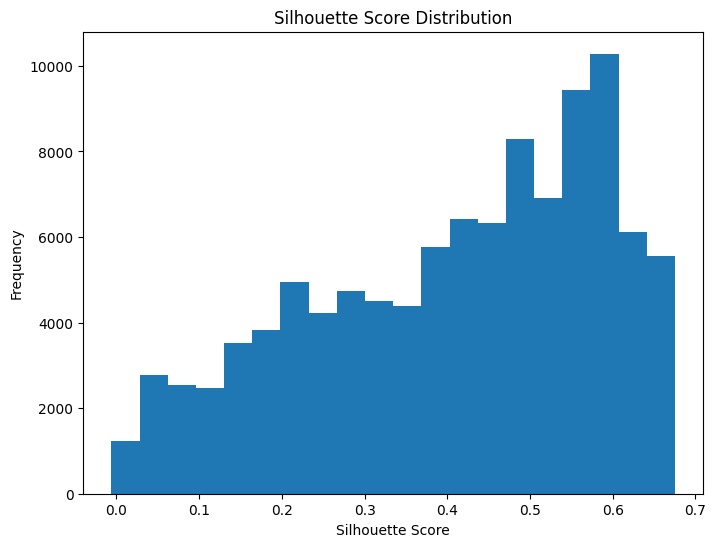

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Calculate silhouette scores for each sample
silhouette_values = silhouette_samples(df_encoded.drop(columns=['cluster']), df_encoded['cluster'])

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20)
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Silhouette Score Distribution')
plt.show()


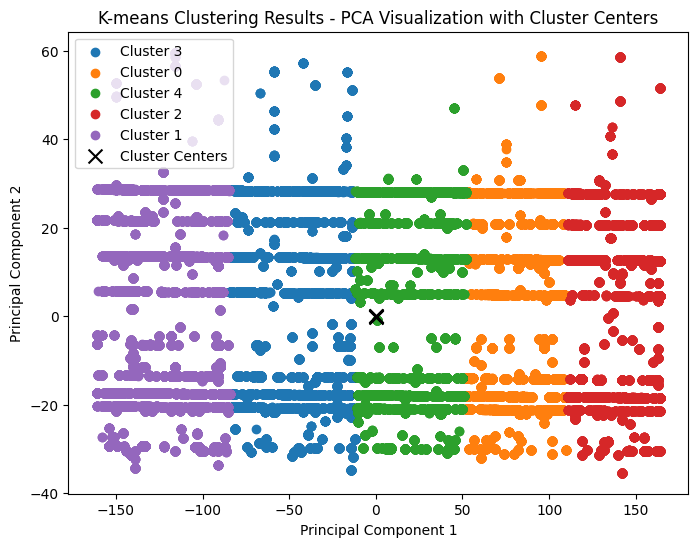

In [14]:
# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in df_encoded['cluster'].unique():
    plt.scatter(df_pca[df_encoded['cluster'] == cluster][:, 0], df_pca[df_encoded['cluster'] == cluster][:, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results - PCA Visualization with Cluster Centers')
plt.legend()
plt.show()


Number of clusters: 1, Inertia: 1008023599.5873003
Number of clusters: 2, Inertia: 279320115.5782068
Number of clusters: 3, Inertia: 137769332.03501603
Number of clusters: 4, Inertia: 95548959.48938137
Number of clusters: 5, Inertia: 80307122.13306078
Number of clusters: 6, Inertia: 65289701.2706405
Number of clusters: 7, Inertia: 58439340.62532464
Number of clusters: 8, Inertia: 52074933.79676537
Number of clusters: 9, Inertia: 45751187.42491854
Number of clusters: 10, Inertia: 41616533.693481185


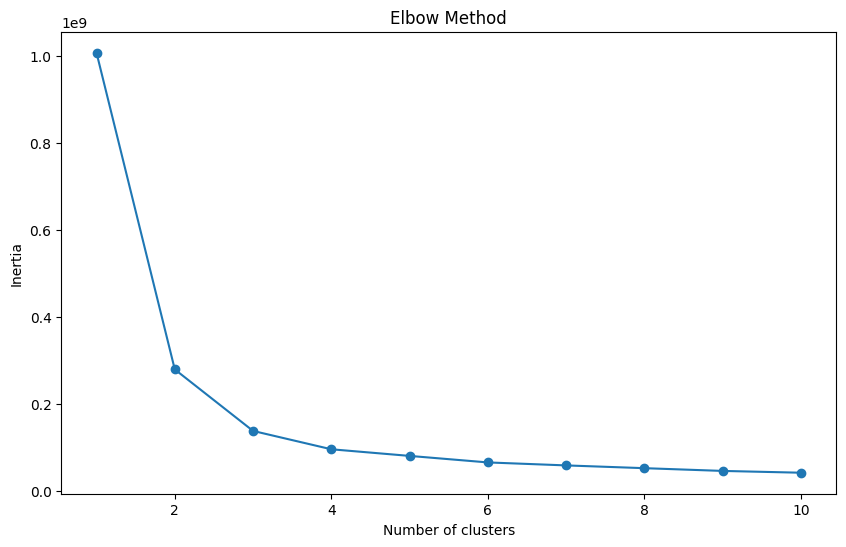

In [15]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_pca)
    inertia.append(kmeans.inertia_)
    print(f"Number of clusters: {n}, Inertia: {kmeans.inertia_}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# Perform K-means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(df_pca)
silhouette_score_3 = silhouette_score(df_pca, kmeans_3.labels_)
print(f"Silhouette Score (3 clusters): {silhouette_score_3}")

# Perform K-means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(df_pca)
silhouette_score_4 = silhouette_score(df_pca, kmeans_4.labels_)
print(f"Silhouette Score (4 clusters): {silhouette_score_4}")


Silhouette Score (3 clusters): 0.5365173789149142
Silhouette Score (4 clusters): 0.47977313568221414


In [17]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
df_pca = pca.fit_transform(df_encoded)

# Check the number of components retained
print("Number of components retained:", pca.n_components_)


Number of components retained: 1


In [18]:
# Perform K-means clustering with the single principal component
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_pca)
silhouette_score_pca = silhouette_score(df_pca, kmeans.labels_)
print(f"Silhouette Score (PCA): {silhouette_score_pca}")


Silhouette Score (PCA): 0.6172944234241695


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you have already preprocessed your data and applied PCA
# Define the number of clusters based on the best silhouette score
best_n_clusters = 3  # You can also choose 4 if you prefer

# Initialize K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(df_pca)  # Assuming df_pca contains your preprocessed data

# Get cluster labels and silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_pca, labels)

# Further analyze the clustering results or perform additional optimizations
# For example, you can visualize the clusters, analyze cluster profiles, or evaluate other metrics.

# Here's a sample code to visualize the clusters using PCA
if df_pca.shape[1] >= 2:
    pca = PCA(n_components=2)
    df_pca_2d = pca.fit_transform(df_pca)

    plt.figure(figsize=(8, 6))
    plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=labels, cmap='viridis')
    plt.title('Clustering Visualization (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
else:
    print("Number of components in PCA is less than 2, unable to visualize clusters in 2D.")

# Print the best number of clusters and silhouette score
print(f"Best number of clusters: {best_n_clusters}")
print(f"Silhouette score for best clustering: {silhouette_avg}")



Number of components in PCA is less than 2, unable to visualize clusters in 2D.
Best number of clusters: 3
Silhouette score for best clustering: 0.6172944234241695


In [21]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Define custom scoring function for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score


param_grid = {
    'n_clusters': [2, 3],  # Number of clusters
    'init': ['k-means++'],  # Method for initialization
    'n_init': [10],  # Number of initializations
    'max_iter': [100],  # Maximum number of iterations
    'tol': [0.001]  # Tolerance to declare convergence
}


# Initialize KMeans
kmeans = KMeans(random_state=42)

# Perform grid search with silhouette score as scoring metric
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(df_pca)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 10, 'tol': 0.001}


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [23]:
# Step 1: Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)

In [24]:
# Step 3: Train KMeans with the best number of clusters
kmeans = KMeans(3, random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [25]:
# Step 4: Predict clusters for the original dataset
cluster_labels = kmeans.predict(df_pca)

In [26]:
df.columns

Index(['rank', 'percentile', 'branch', 'gender', 'category', 'seat_type',
       'primary_seat_type', 'secondary_seat_type', 'college_name'],
      dtype='object')

In [27]:
df_encoded.columns.unique()

Index(['rank', 'percentile', 'branch', 'college_name', 'gender_F', 'gender_M',
       'category_DT/VJ', 'category_DT/VJ#', 'category_DT/VJ$',
       'category_DT/VJ$#',
       ...
       'secondary_seat_type_Economically Weaker Section Seats',
       'secondary_seat_type_Home University Seats Allotted to Home University Candidates',
       'secondary_seat_type_Home University Seats Allotted to Other Than Home University Candidates',
       'secondary_seat_type_Maharashtra State Seats Allotted to All India Candidature Candidates with JEE(Main) Score',
       'secondary_seat_type_Maharashtra State Seats Allotted to All India Candidature Candidates with MHT-CET Score',
       'secondary_seat_type_ORPHAN Seats',
       'secondary_seat_type_Other Than Home University Seats Allotted to Home University Candidates',
       'secondary_seat_type_Other Than Home University Seats Allotted to Other Than Home University Candidates',
       'secondary_seat_type_State Level Seats', 'cluster'],
      d

In [28]:
# Step 5: Append cluster labels to the DataFrame
df_encoded['cluster'] = cluster_labels

In [54]:
df_encoded['cluster'].head()

0    1
1    1
2    1
3    1
4    1
Name: cluster, dtype: int32

In [29]:
# Step 6: Separate features (X) and target (y)
X = df_encoded.drop(columns=['rank'])
y = df_encoded['rank']

In [66]:
x1=df_encoded.drop(columns=['percentile'])
y1=df_encoded['percentile']
x1=df_encoded.drop(columns=['percentile'])
y1=df_encoded['percentile']

In [30]:
# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Step 7: Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [46]:
# Step 8: Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
# Step 8: Fit a simple linear regression model
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [48]:
# Step 9: Make predictions
y_pred = model.predict(X_test)
y_pred

array([ 0.43522943, -0.17811439, -0.64121486, ...,  1.78445962,
       -0.56004967,  0.3009096 ])

In [49]:
# Step 9: Make predictions
y_pred1 = model1.predict(X_test1)
y_pred1

array([-0.74149726,  0.27771302,  1.08633346, ..., -1.67926521,
       -0.14847809, -0.39115104])

In [57]:
# Step 10: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse_ll = mean_squared_error(y_test, y_pred)
r2_ll = r2_score(y_test, y_pred)

print(f"Mean Squared Error mse: {mse_ll}")
print(f"R-squared (R2) Score: {r2_ll}")

Mean Squared Error mse: 0.04012249745503019
R-squared (R2) Score: 0.9594387466902057


In [56]:
# Step 10: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)
printf("Percentile")
print(f"Mean Squared Error mse1: {mse1}")
print(f"R-squared (R2) Score: {r21}")

Mean Squared Error mse1: 0.046754526745778846
R-squared (R2) Score: 0.9527684710041421


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Step 3: Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = ridge_model.predict(X_test)

# Step 5: Evaluate the model
mse_rr = mean_squared_error(y_test, y_pred)
r2_rr = r2_score(y_test, y_pred)

print("Mean Squared Error (Ridge Regression):", mse_rr)
print("R-squared (R2) Score (Ridge Regression):", r2_rr)


Mean Squared Error (Ridge Regression): 0.040059289049059144
R-squared (R2) Score (Ridge Regression): 0.9595026463058458


In [73]:
from sklearn.tree import DecisionTreeRegressor

# Step 8: Fit a decision tree regression model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

# Step 10: Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_tree)
r2_dt = r2_score(y_test, y_pred_tree)

print(f"Mean Squared Error (Decision Tree): {mse_dt}")
print(f"R-squared (R2) Score (Decision Tree): {r2_dt}")


Mean Squared Error (Decision Tree): 0.0022195540470185274
R-squared (R2) Score (Decision Tree): 0.997756174225276


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

# Step 3: Train the Random Forest Regression model
random_forest_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = random_forest_model.predict(X_test)

# Step 5: Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Mean Squared Error (Random Forest):", mse_rf)
print("R-squared (R2) Score (Random Forest):", r2_rf)


Mean Squared Error (Random Forest): 0.0018270210115222674
R-squared (R2) Score (Random Forest): 0.9981529997694254


In [58]:
import pickle

# Dump the fitted model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


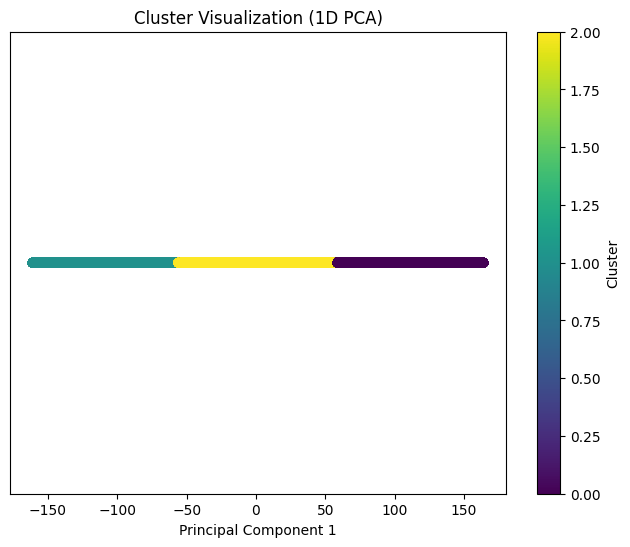

In [35]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize K-means with best parameters
best_kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=100, tol=0.001, random_state=42)
best_kmeans.fit(df_pca)

# Get cluster labels
cluster_labels = best_kmeans.labels_

# Perform PCA to reduce dimensionality to 1D
pca_1d = PCA(n_components=1)
df_pca_1d = pca_1d.fit_transform(df_pca)

# Visualize clusters in 1D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_1d, [0] * len(df_pca_1d), c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization (1D PCA)')
plt.xlabel('Principal Component 1')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()


Linear Regression Model Evaluation:
Mean Squared Error (Linear Regression): 0.040059289049059144
R-squared (R2) Score (Linear Regression): 0.9595026463058458


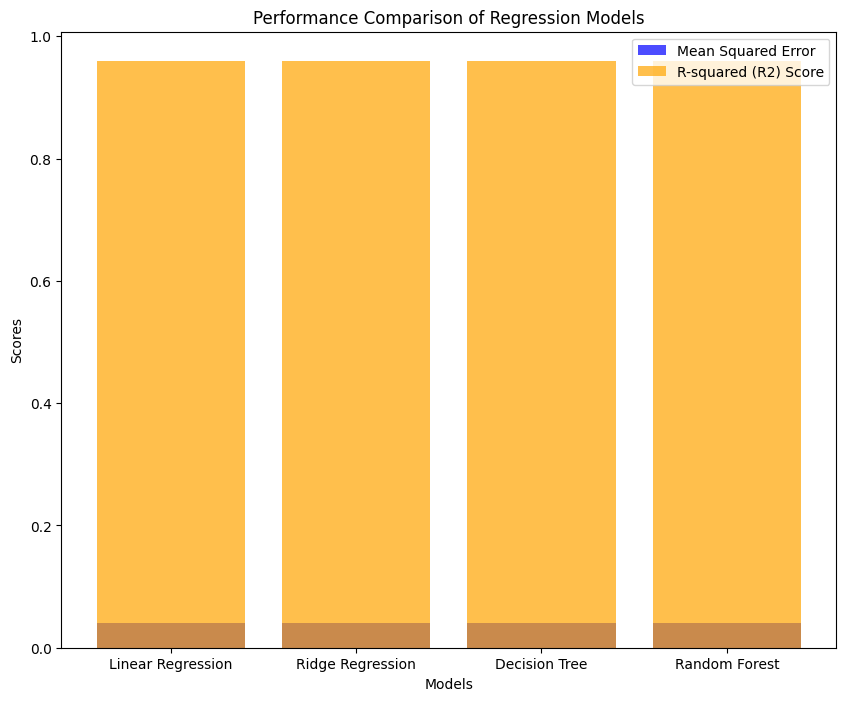

In [78]:
# Step 10: Evaluate the Linear Regression model
mse_ll = mean_squared_error(y_test, y_pred)
r2_ll = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (Linear Regression): {mse_ll}")
print(f"R-squared (R2) Score (Linear Regression): {r2_ll}")

# Step 5: Evaluate the Ridge Regression model
mse_rr = mean_squared_error(y_test, y_pred)
r2_rr = r2_score(y_test, y_pred)

# Step 6: Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

# Step 7: Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Step 11: Plotting
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']
mse_scores = [mse_ll, mse_rr, mse_dt, mse_rf]
r2_scores = [r2_ll, r2_rr, r2_dt, r2_rf]

plt.figure(figsize=(10, 8))
plt.bar(models, mse_scores, color='blue', alpha=0.7, label='Mean Squared Error')
plt.bar(models, r2_scores, color='orange', alpha=0.7, label='R-squared (R2) Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison of Regression Models')
plt.legend()
plt.show()


In [80]:
print("Ridge Regression Model Evaluation:")
print(f"Mean Squared Error (Ridge Regression): {mse_rr}")
print(f"R-squared (R2) Score (Ridge Regression): {r2_rr}")

print("Decision Tree Model Evaluation:")
print(f"Mean Squared Error (Decision Tree): {mse_dt}")
print(f"R-squared (R2) Score (Decision Tree): {r2_dt}")
print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (R2) Score (Random Forest): {r2_rf}")

Ridge Regression Model Evaluation:
Mean Squared Error (Ridge Regression): 0.040059289049059144
R-squared (R2) Score (Ridge Regression): 0.9595026463058458
Decision Tree Model Evaluation:
Mean Squared Error (Decision Tree): 0.040059289049059144
R-squared (R2) Score (Decision Tree): 0.9595026463058458
Random Forest Model Evaluation:
Mean Squared Error (Random Forest): 0.040059289049059144
R-squared (R2) Score (Random Forest): 0.9595026463058458


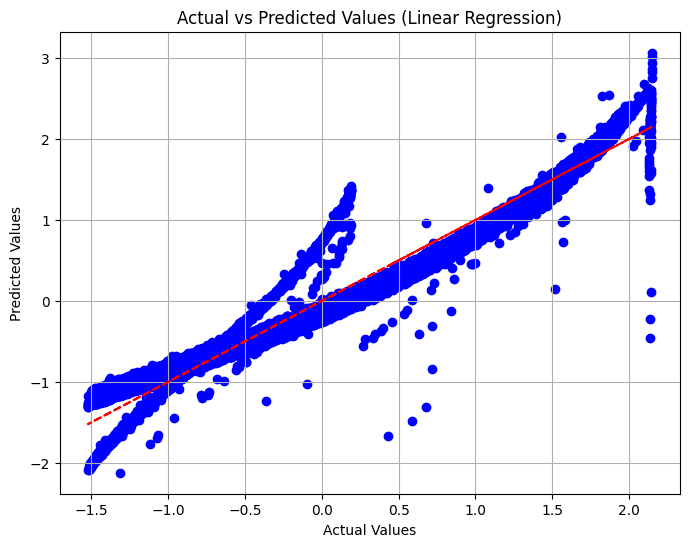

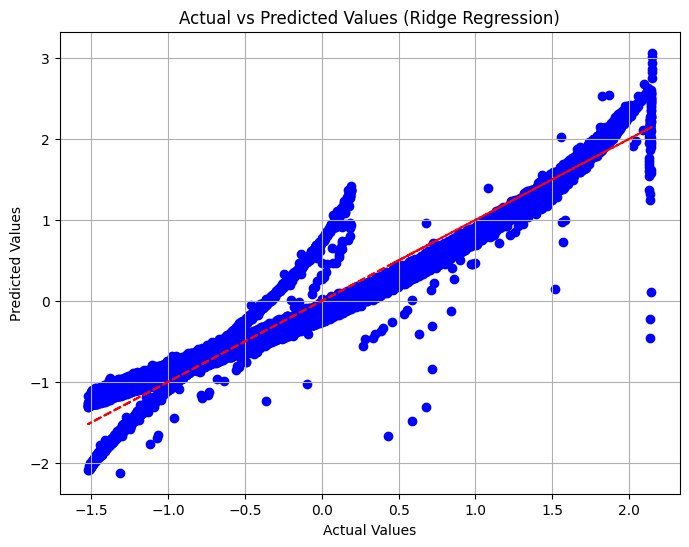

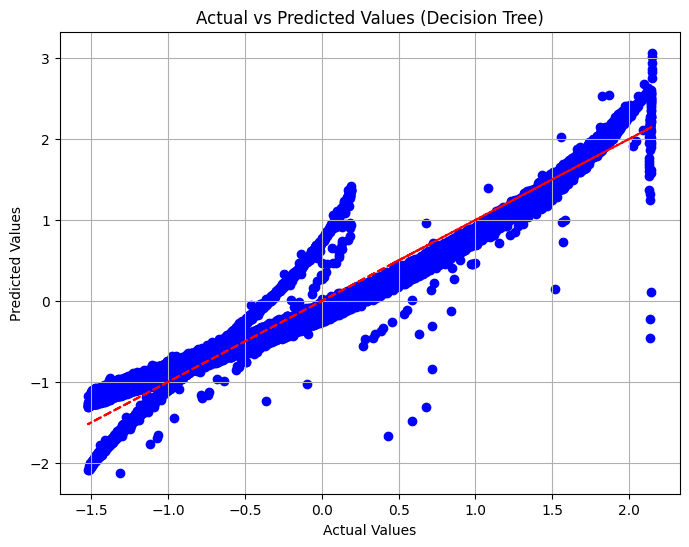

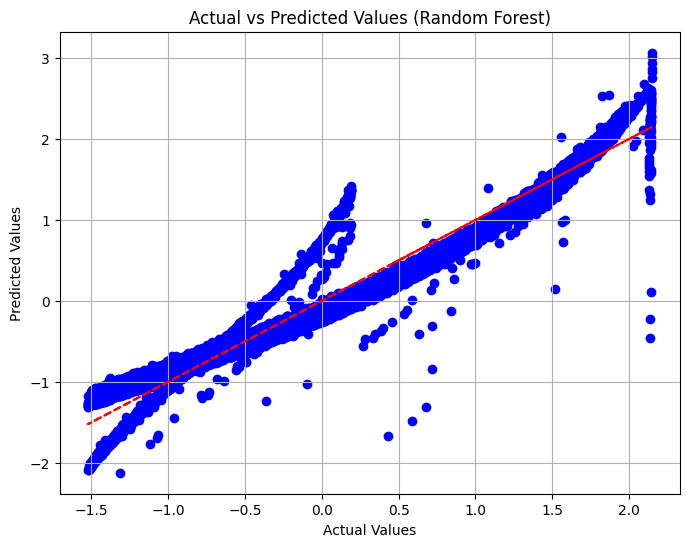

In [81]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(actual, predicted, algorithm):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, color='blue')
    plt.plot(actual, actual, color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Values ({algorithm})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Plot for Linear Regression
plot_actual_vs_predicted(y_test, y_pred, 'Linear Regression')

# Plot for Ridge Regression
plot_actual_vs_predicted(y_test, y_pred, 'Ridge Regression')

# Plot for Decision Tree
plot_actual_vs_predicted(y_test, y_pred, 'Decision Tree')

# Plot for Random Forest
plot_actual_vs_predicted(y_test, y_pred, 'Random Forest')


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('mht_cet2.csv')

# Drop unnecessary columns
columns_to_remove = ["fulfillment", "branch_code", "enrollment_no", "score_type"]
df = df.drop(columns=columns_to_remove)

# Encode categorical variables
label_encoder = LabelEncoder()
df['branch'] = label_encoder.fit_transform(df['branch'])
df['college_name'] = label_encoder.fit_transform(df['college_name'])

# One-hot encode remaining categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'category', 'seat_type', 'primary_seat_type', 'secondary_seat_type'])

# Normalize numerical variables
scaler = StandardScaler()
df_encoded[['rank', 'percentile']] = scaler.fit_transform(df_encoded[['rank', 'percentile']])


In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score




In [6]:
# Sample a subset of the data
sampled_df_encoded = df_encoded.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Fit Agglomerative Clustering on the sampled data
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(sampled_df_encoded)

# Calculate silhouette score
silhouette_avg = silhouette_score(sampled_df_encoded, agglomerative.labels_)
print("Silhouette Score (Agglomerative Clustering):", silhouette_avg)


Silhouette Score (Agglomerative Clustering): 0.5140668503524339


In [7]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

# Step 1: Perform Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_encoded)

# Step 2: Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_clusters = dbscan.fit_predict(df_encoded)

# Step 3: Calculate Silhouette Score for DBSCAN Clustering
silhouette_avg_dbscan = silhouette_score(df_encoded, dbscan_clusters)
print("Silhouette Score (DBSCAN Clustering):", silhouette_avg_dbscan)


Silhouette Score (DBSCAN Clustering): -0.4051711699689698


In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

# Assuming df_encoded is your preprocessed data
X = df_encoded  # Features

# Example: KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(X, kmeans.labels_)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(X, kmeans.labels_)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx) 


Silhouette Score: 0.5350520330100166
Davies-Bouldin Index: 0.6102417767405616
Calinski-Harabasz Index: 328210.4961981353


In [9]:
import pandas as pd

# Sample DataFrame
data = {
    'rank': [18388, 18898, 19374, 21857, 22128],
    'percentile': [90.121473, 89.889223, 89.540152, 88.241971, 88.091617],
    'branch': ['Civil Engineering']*5,
    'gender': ['M', 'F', 'M', 'M', 'M'],
    'category': ['NT 2 (NT-C)', 'SC', 'OBC', 'OBC', 'DT/VJ'],
    'seat_type': ['GOPENS', 'LOPENS', 'GOPENS', 'GOPENS', 'GOPENS'],
    'primary_seat_type': ['State Level Seats']*5,
    'secondary_seat_type': ['State Level Seats']*5,
    'college_name': ['Government College of Engineering, Amravati']*5
}

df = pd.DataFrame(data)

# Set Positional Index
df_positional_index = df.reset_index(drop=True)

# Set Categorical Index
df['branch'] = df['branch'].astype('category')
df['gender'] = df['gender'].astype('category')
df['category'] = df['category'].astype('category')
df['seat_type'] = df['seat_type'].astype('category')
df['primary_seat_type'] = df['primary_seat_type'].astype('category')
df['secondary_seat_type'] = df['secondary_seat_type'].astype('category')
df['college_name'] = df['college_name'].astype('category')

# Display DataFrame with Categorical Indexes
print(df.info())

# Checking the indices
print(f"Positional Index: {df_positional_index.index}")
print(f"Categorical Indexes: \n{df[['branch', 'gender', 'category', 'seat_type', 'primary_seat_type', 'secondary_seat_type', 'college_name']].dtypes}")

# Composite Index Example (Uncommon in your data but illustrative)
df_composite_index = df.set_index(['branch', 'gender'])
print(f"Composite Index DataFrame: \n{df_composite_index.head()}")

# Identify index type
def identify_index_type(df):
    if isinstance(df.index, pd.RangeIndex):
        print("Positional Index")
    elif isinstance(df.index, pd.CategoricalIndex):
        print("Categorical Index")
    elif isinstance(df.index, pd.MultiIndex):
        print("Composite Index")
    else:
        print("Other Index Type")

identify_index_type(df)
identify_index_type(df_composite_index)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   rank                 5 non-null      int64   
 1   percentile           5 non-null      float64 
 2   branch               5 non-null      category
 3   gender               5 non-null      category
 4   category             5 non-null      category
 5   seat_type            5 non-null      category
 6   primary_seat_type    5 non-null      category
 7   secondary_seat_type  5 non-null      category
 8   college_name         5 non-null      category
dtypes: category(7), float64(1), int64(1)
memory usage: 1.1 KB
None
Positional Index: RangeIndex(start=0, stop=5, step=1)
Categorical Indexes: 
branch                 category
gender                 category
category               category
seat_type              category
primary_seat_type      category
secondary_seat_type    category
col

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Instantiate the GMM model
gmm = GaussianMixture(n_components=3)  # You can adjust the number of components as needed

# Fit the model to your data
gmm.fit(df_encoded)

# Predict the cluster labels
labels = gmm.predict(df_encoded)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_encoded, labels)
print("Silhouette Score (Gaussian Mixture Models):", silhouette_avg)


Silhouette Score (Gaussian Mixture Models): -0.043448593937227116
